# Coursera Capstone Project for IBM Data Science Specialization - Week 2
**By Aravindan Natarajan**

# 1. Introduction

## 1.1. Background

Dallas city is one of the most popoulous city in U.S. and is home to many immigrant population in Texas after San Antonio and Houston. Furthermore, it is the fourth-largest metropolitan area in the U.S. at 7.5 million people as of 2018 with an estimated population of 7,846,293 residents.
Being an metropolitan city, Dallas is also home to many restaurants which serves wide variety of cuisines. Owing to significant number of Indian expatriate population, Dallas City and its nearby Suburbs have handful of Indian restaurant.

So, as a part of this project Indian restaurants in Dallas City will be listed, visualized and rated.

## 1.2. Problem Description

By utilizing the Dallas City restaurants inspection data, Indian Restaurants in Dallas City and their risk category will be Analyzed. Secondly, a classsifier model will be built to predict the risk categories of resturants. Furthermore, using the foursqure API we will get the ratings of Indian Restaurants in Dallas City.

## 1.3. Target Audience
* People looking to open new restaurants
* Restaurants
* Travelers who love Indian food

# 2. Data

For this project we will use the following data :

1. Dallas City restaurants inspection data from 2016-2019

*  Data source : https://www.dallasopendata.com/api/views/dri5-wcct/rows.csv?accessType=DOWNLOAD

*  Description : This data set contains 37876 rows and 114 coulmns with Restaurant Name, Street Name, violation descriptions along with their latitude and longitude. This data will be downloaded and used.

2. Ratings of Indian resturants for selected locality in Dallas City

* Data source : Fousquare API

*  Description : By using this api we will get all the ratings for Indian restaurants in selected neighborhood

# 3.Methodology

1. Collect the Dallas City Restaurants Inspection data from https://www.dallasopendata.com/api/views/dri5-wcct/rows.csv?accessType=DOWNLOAD
2. Analyze the restaurants based on their risk category
3. Built machine learning classifier model for predicting the risk category the resturants are placed
4. Filter out all venues from the inspection data that are Indian Resturants.
5. Visualize the Indian Restaurants using folium library(python)
6. Find rating , tips and like count for each Indian Resturants using FourSquare API.

# 4. Data Processing

Load the necessarry libraries

In [0]:
import pandas as pd
import numpy as np

# import plotting libraries

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# import modelling libraries

from sklearn import *
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# import mapping rendering library
import folium 

# import JSON file handling library 

import json

# import Requests Handler library

import requests
from requests import get

# import geocoding libraries
from geopy.geocoders import Nominatim

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

In [0]:
# Load the restaurant inspection data into dataframe 

dallas_df = pd.read_csv("Dallas_Restaurant_Inspection.csv")
dallas_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (107,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Restaurant Name,Inspection Type,Inspection Date,Inspection Score,Street Number,Street Name,Street Direction,Street Type,Street Unit,Street Address,Zip Code,Violation Description - 1,Violation Points - 1,Violation Detail - 1,Violation Memo - 1,Violation Description - 2,Violation Points - 2,Violation Detail - 2,Violation Memo - 2,Violation Description - 3,Violation Points - 3,Violation Detail - 3,Violation Memo - 3,Violation Description - 4,Violation Points - 4,Violation Detail - 4,Violation Memo - 4,Violation Description - 5,Violation Points - 5,Violation Detail - 5,Violation Memo - 5,Violation Description - 6,Violation Points - 6,Violation Detail - 6,Violation Memo - 6,Violation Description - 7,Violation Points - 7,Violation Detail - 7,Violation Memo - 7,Violation Description - 8,...,Violation Memo - 16,Violation Description - 17,Violation Points - 17,Violation Detail - 17,Violation Memo - 17,Violation Description - 18,Violation Points - 18,Violation Detail - 18,Violation Memo - 18,Violation Description - 19,Violation Points - 19,Violation Detail - 19,Violation Memo - 19,Violation Description - 20,Violation Points - 20,Violation Detail - 20,Violation Memo - 20,Violation Description - 21,Violation Points - 21,Violation Detail - 21,Violation Memo - 21,Violation Description - 22,Violation Points - 22,Violation Detail - 22,Violation Memo - 22,Violation Description - 23,Violation Points - 23,Violation Detail - 23,Violation Memo - 23,Violation Description - 24,Violation Points - 24,Violation Detail - 24,Violation Memo - 24,Violation Description - 25,Violation Points - 25,Violation Detail - 25,Violation Memo - 25,Inspection Month,Inspection Year,Lat Long Location
0,HARVEY'S,Routine,10/03/2016,82,12835,PRESTON,NaN,RD,#306,12835 PRESTON RD #306,75230,"*34 Outer door: solid,selfclosing,tightfitting",1.0,228.174 Physical Facilities. Functio...,NaN,*29 Concentration of the sanitizing solution s...,2.0,"228.111 Equipment, Utensils, and Linens. ...",None,*19 Backflow prevention device - installed,3.0,"228.147 Water, Plumbing, and Waste. ...",Mop sink,*35 Hair Restraints effective,1.0,228.43 Management and Personnel. Hair restr...,Hair and beard nets needed,*20 Grease Trap Tickets,3.0,Ch.19-126.5(c)) A producer shall sign the ...,NaN,*09 Food protected cross contamination arrang...,3.0,228.66 Food. Preventing food and ing...,Raw shell eggs RTE foods - WIR Raw hamburger ...,*02 Cold Hold (41øF/45øF or below),3.0,228.75 Food. Time and temperature co...,Cut tomatoes at 53.3 degrees - Top of the POUR...,*21 RFSM - Not On Site,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 2016,FY2017,"12835 PRESTON RD #306\n(32.924235, -96.803626)"
1,7-11,Routine,10/03/2016,86,5123,LOVERS,W,LN,NaN,5123 W LOVERS LN,75209,"*18 Chemical sanitizer generated onsite, devic...",3.0,"228.111 Equipment, Utensils, and Linens. ...",NaN,*03 Food products not maintained at 135øF or a...,3.0,228.75 Food. Time and temperature co...,hot dog 113'f,"*31 Individual, disposable towels",2.0,228.175 Physical Facilities. Handwas...,NaN,"*07 Food safe, good condition, unadulterated, ...",3.0,"228.61 Food. Condition safe, unadulte...",seal open packages of food in rif,*34 Pest Control,1.0,228.186 Physical Facilities. Premise...,NaN,*21 RFSM - Not On Site,2.0,Sec. 17-2.2(c)(1)(D) (c) Registered food ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 2016,FY2017,"5123 W LOVERS LN\n(32.851252, -96.823033)"
2,MI HONDURAS,Routine,10/03/2016,75,10818,DENNIS,NaN,RD,#101,10818 DENNIS RD #101,75229,*14 When to wash hands after handling soiled e...,3.0,228.38 Management and Personnel. (d)...,All hand sinks were blocked,*21 RFSM - Not On Site,2.0,Sec. 17-2.2(c)(1)(D) (c) Registered food ...,NaN,*47 Food prep/utensil wash/mop sink not for ha...,1.0,228.175 Phy

In [0]:
# Check datatypes of columns present in the above dataframe

dallas_df.dtypes

Restaurant Name                object
Inspection Type                object
Inspection Date                object
Inspection Score                int64
Street Number                   int64
Street Name                    object
Street Direction               object
Street Type                    object
Street Unit                    object
Street Address                 object
Zip Code                       object
Violation Description - 1      object
Violation Points - 1          float64
Violation Detail - 1           object
Violation Memo - 1             object
Violation Description - 2      object
Violation Points - 2          float64
Violation Detail - 2           object
Violation Memo - 2             object
Violation Description - 3      object
Violation Points - 3          float64
Violation Detail - 3           object
Violation Memo - 3             object
Violation Description - 4      object
Violation Points - 4          float64
Violation Detail - 4           object
Violation Me

In [0]:
# Get the Column Names

dallas_df.columns

Index(['Restaurant Name', 'Inspection Type', 'Inspection Date',
       'Inspection Score', 'Street Number', 'Street Name', 'Street Direction',
       'Street Type', 'Street Unit', 'Street Address',
       ...
       'Violation Points - 24', 'Violation Detail - 24', 'Violation Memo - 24',
       'Violation Description - 25', 'Violation Points - 25',
       'Violation Detail - 25', 'Violation Memo - 25', 'Inspection Month',
       'Inspection Year', 'Lat Long Location'],
      dtype='object', length=114)

In [0]:
# Create a new dataframe with necessarry columns to work with

dallas_mod_df = pd.DataFrame(columns=['Restaurant Name', 'Street Name','Zip Code', 'Inspection Type', 'Inspection Date',
       'Inspection Score', 'Inspection Month', 'Lat Long Location'], data=dallas_df)
dallas_mod_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Inspection Month,Lat Long Location
0,HARVEY'S,PRESTON,75230,Routine,10/03/2016,82,Oct 2016,"12835 PRESTON RD #306\n(32.924235, -96.803626)"
1,7-11,LOVERS,75209,Routine,10/03/2016,86,Oct 2016,"5123 W LOVERS LN\n(32.851252, -96.823033)"
2,MI HONDURAS,DENNIS,75229,Routine,10/03/2016,75,Oct 2016,"10818 DENNIS RD #101\n(32.895847, -96.881391)"
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,10/03/2016,82,Oct 2016,"1328 N JIM MILLER RD #104\n(32.73556, -96.700079)"
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,10/03/2016,80,Oct 2016,"2323 N JIM MILLER RD\n(32.756246, -96.701964)"


In [0]:
# Check the shape of the modified dataframe

dallas_mod_df.shape

(37875, 8)

In [0]:
# Drop columns that have null values

dallas_mod_df.dropna(axis=0, how='any', inplace=True)
dallas_mod_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Inspection Month,Lat Long Location
0,HARVEY'S,PRESTON,75230,Routine,10/03/2016,82,Oct 2016,"12835 PRESTON RD #306\n(32.924235, -96.803626)"
1,7-11,LOVERS,75209,Routine,10/03/2016,86,Oct 2016,"5123 W LOVERS LN\n(32.851252, -96.823033)"
2,MI HONDURAS,DENNIS,75229,Routine,10/03/2016,75,Oct 2016,"10818 DENNIS RD #101\n(32.895847, -96.881391)"
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,10/03/2016,82,Oct 2016,"1328 N JIM MILLER RD #104\n(32.73556, -96.700079)"
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,10/03/2016,80,Oct 2016,"2323 N JIM MILLER RD\n(32.756246, -96.701964)"


In [0]:
# Check the dataframe shape

dallas_mod_df.shape

(37864, 8)

In [0]:
# Get the information about the modified dataframe

dallas_mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37864 entries, 0 to 37874
Data columns (total 8 columns):
Restaurant Name      37864 non-null object
Street Name          37864 non-null object
Zip Code             37864 non-null object
Inspection Type      37864 non-null object
Inspection Date      37864 non-null object
Inspection Score     37864 non-null int64
Inspection Month     37864 non-null object
Lat Long Location    37864 non-null object
dtypes: int64(1), object(7)
memory usage: 2.6+ MB


Since, we have now loaded the dataframe now lets clean the datframe and do some type conversions for ease of processing

## 3.1. Data Cleaning

In [0]:
# Create Latitude and Longitude Dataframe

ll_df = pd.DataFrame(columns = ['Lat Long Location'], data=dallas_mod_df)
ll_df.head()

,Lat Long Location
0,"12835 PRESTON RD #306\n(32.924235, -96.803626)"
1,"5123 W LOVERS LN\n(32.851252, -96.823033)"
2,"10818 DENNIS RD #101\n(32.895847, -96.881391)"
3,"1328 N JIM MILLER RD #104\n(32.73556, -96.700079)"
4,"2323 N JIM MILLER RD\n(32.756246, -96.701964)"


Split the Lat Long Location Column to get location co-ordinates and address separately

In [0]:
# dropping any null value to avoid errors
ll_df.dropna(inplace = True)

# new data frame with split value columns 
ll_df_mod= ll_df["Lat Long Location"].str.split("\n", n = 1, expand = True)                                                          

# making separate column for latitude & longitude
ll_df["Street Address"]= ll_df_mod[0]

ll_df["Lat_Long"] = ll_df_mod[1]

# Dropping old Name columns 
ll_df.drop(columns =["Lat Long Location"], inplace = True)

ll_df.head()

,Street Address,Lat_Long
0,12835 PRESTON RD #306,"(32.924235, -96.803626)"
1,5123 W LOVERS LN,"(32.851252, -96.823033)"
2,10818 DENNIS RD #101,"(32.895847, -96.881391)"
3,1328 N JIM MILLER RD #104,"(32.73556, -96.700079)"
4,2323 N JIM MILLER RD,"(32.756246, -96.701964)"


In [0]:
ll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37864 entries, 0 to 37874
Data columns (total 2 columns):
Street Address    37864 non-null object
Lat_Long          36554 non-null object
dtypes: object(2)
memory usage: 887.4+ KB


In [0]:
# Split Lat_Long Column further

ll_df_new= ll_df["Lat_Long"].str.split(",", n = 1, expand = True)

ll_df["Latitude"] = ll_df_new[0]
ll_df["Longitude"] = ll_df_new[1]

# Dropping old Name columns 
ll_df.drop(columns =["Lat_Long"], inplace = True)

ll_df.head()

,Street Address,Latitude,Longitude
0,12835 PRESTON RD #306,(32.924235,-96.803626)
1,5123 W LOVERS LN,(32.851252,-96.823033)
2,10818 DENNIS RD #101,(32.895847,-96.881391)
3,1328 N JIM MILLER RD #104,(32.73556,-96.700079)
4,2323 N JIM MILLER RD,(32.756246,-96.701964)


In [0]:
ll_df["Latitude"] = ll_df["Latitude"].str.replace(r'(', '')
ll_df["Longitude"] = ll_df["Longitude"].str.replace(r')', '')
ll_df.head()

,Street Address,Latitude,Longitude
0,12835 PRESTON RD #306,32.924235,-96.803626
1,5123 W LOVERS LN,32.851252,-96.823033
2,10818 DENNIS RD #101,32.895847,-96.881391
3,1328 N JIM MILLER RD #104,32.73556,-96.700079
4,2323 N JIM MILLER RD,32.756246,-96.701964


In [0]:
ll_df.drop(["Street Address"], axis = 1, inplace=True)
ll_df.head()

,Latitude,Longitude
0,32.924235,-96.803626
1,32.851252,-96.823033
2,32.895847,-96.881391
3,32.73556,-96.700079
4,32.756246,-96.701964


Now we have the Latitudes and Longitudes in separate columns we need to merge it to the modified dataframe. But before that we need to drop the Lat Long Location Column

In [0]:
dallas_mod_df.drop(["Lat Long Location"], axis = 1, inplace=True)
dallas_mod_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Inspection Month
0,HARVEY'S,PRESTON,75230,Routine,10/03/2016,82,Oct 2016
1,7-11,LOVERS,75209,Routine,10/03/2016,86,Oct 2016
2,MI HONDURAS,DENNIS,75229,Routine,10/03/2016,75,Oct 2016
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,10/03/2016,82,Oct 2016
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,10/03/2016,80,Oct 2016


Now merge the ll_df with dallas_mod_df

In [0]:
dallas_merged_df = pd.concat([dallas_mod_df, ll_df], axis=1)
dallas_merged_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Inspection Month,Latitude,Longitude
0,HARVEY'S,PRESTON,75230,Routine,10/03/2016,82,Oct 2016,32.924235,-96.803626
1,7-11,LOVERS,75209,Routine,10/03/2016,86,Oct 2016,32.851252,-96.823033
2,MI HONDURAS,DENNIS,75229,Routine,10/03/2016,75,Oct 2016,32.895847,-96.881391
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,10/03/2016,82,Oct 2016,32.73556,-96.700079
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,10/03/2016,80,Oct 2016,32.756246,-96.701964


Check to see if any null values are present

In [0]:
dallas_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37864 entries, 0 to 37874
Data columns (total 9 columns):
Restaurant Name     37864 non-null object
Street Name         37864 non-null object
Zip Code            37864 non-null object
Inspection Type     37864 non-null object
Inspection Date     37864 non-null object
Inspection Score    37864 non-null int64
Inspection Month    37864 non-null object
Latitude            36554 non-null object
Longitude           36554 non-null object
dtypes: int64(1), object(8)
memory usage: 2.9+ MB


Still there are some null values are present. So let's clean them

In [0]:
dallas_merged_df.dropna(axis=0, how='any', inplace=True)
dallas_merged_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Inspection Month,Latitude,Longitude
0,HARVEY'S,PRESTON,75230,Routine,10/03/2016,82,Oct 2016,32.924235,-96.803626
1,7-11,LOVERS,75209,Routine,10/03/2016,86,Oct 2016,32.851252,-96.823033
2,MI HONDURAS,DENNIS,75229,Routine,10/03/2016,75,Oct 2016,32.895847,-96.881391
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,10/03/2016,82,Oct 2016,32.73556,-96.700079
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,10/03/2016,80,Oct 2016,32.756246,-96.701964


Check to see if there are still some null values are present

In [0]:
dallas_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36554 entries, 0 to 37874
Data columns (total 9 columns):
Restaurant Name     36554 non-null object
Street Name         36554 non-null object
Zip Code            36554 non-null object
Inspection Type     36554 non-null object
Inspection Date     36554 non-null object
Inspection Score    36554 non-null int64
Inspection Month    36554 non-null object
Latitude            36554 non-null object
Longitude           36554 non-null object
dtypes: int64(1), object(8)
memory usage: 2.8+ MB


Now the dataframe is ready for further processing. However, before proceeding further let's add a risk column by binning the inspection scores into following categories using the guidelines in http://www2.dallascityhall.com/FoodInspection/SearchScores.cfm. Let's create three categories for ease of classification:
1.   High Risk - Inpection Score between -5 to 60
2.   Medium Risk - Inpection Score between 60 to 80
3.   Low Risk - Inspection Score between 80 to 100

In [0]:
# Create risk category bins

bins = [-5, 60, 80, 100]
labels =["High Risk","Medium Risk","Low Risk"]
dallas_merged_df['Risk'] = pd.cut(dallas_merged_df['Inspection Score'], bins,labels=labels)
dallas_merged_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Inspection Month,Latitude,Longitude,Risk
0,HARVEY'S,PRESTON,75230,Routine,10/03/2016,82,Oct 2016,32.924235,-96.803626,Low Risk
1,7-11,LOVERS,75209,Routine,10/03/2016,86,Oct 2016,32.851252,-96.823033,Low Risk
2,MI HONDURAS,DENNIS,75229,Routine,10/03/2016,75,Oct 2016,32.895847,-96.881391,Medium Risk
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,10/03/2016,82,Oct 2016,32.73556,-96.700079,Low Risk
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,10/03/2016,80,Oct 2016,32.756246,-96.701964,Medium Risk


The Inpsection month category column contains both month and year let's split it up further so that it can be used later.

In [0]:
# dropping any null value to avoid errors
dallas_merged_df.dropna(inplace = True)

# new data frame with split value columns 
dl_df_mod= dallas_merged_df["Inspection Month"].str.split(" ", n = 1, expand = True)                                                          

# making separate column for Month & Year
dallas_merged_df["Month"]= dl_df_mod[0]

dallas_merged_df["Inspection Year"] = dl_df_mod[1]

# Dropping old Name columns 
dallas_merged_df.drop(columns =["Inspection Month"], inplace = True)

dallas_merged_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Month,Inspection Year
0,HARVEY'S,PRESTON,75230,Routine,10/03/2016,82,32.924235,-96.803626,Low Risk,Oct,2016
1,7-11,LOVERS,75209,Routine,10/03/2016,86,32.851252,-96.823033,Low Risk,Oct,2016
2,MI HONDURAS,DENNIS,75229,Routine,10/03/2016,75,32.895847,-96.881391,Medium Risk,Oct,2016
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,10/03/2016,82,32.73556,-96.700079,Low Risk,Oct,2016
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,10/03/2016,80,32.756246,-96.701964,Medium Risk,Oct,2016


In [0]:
dallas_merged_df.rename(columns={"Month":"Inspection Month"}, inplace=True)
dallas_merged_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year
0,HARVEY'S,PRESTON,75230,Routine,10/03/2016,82,32.924235,-96.803626,Low Risk,Oct,2016
1,7-11,LOVERS,75209,Routine,10/03/2016,86,32.851252,-96.823033,Low Risk,Oct,2016
2,MI HONDURAS,DENNIS,75229,Routine,10/03/2016,75,32.895847,-96.881391,Medium Risk,Oct,2016
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,10/03/2016,82,32.73556,-96.700079,Low Risk,Oct,2016
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,10/03/2016,80,32.756246,-96.701964,Medium Risk,Oct,2016


Convert Inspection Date column to datetime variable 

In [0]:
dallas_merged_df['Inspection Date'] = pd.to_datetime(dallas_merged_df['Inspection Date'])
dallas_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36553 entries, 0 to 37874
Data columns (total 11 columns):
Restaurant Name     36553 non-null object
Street Name         36553 non-null object
Zip Code            36553 non-null object
Inspection Type     36553 non-null object
Inspection Date     36553 non-null datetime64[ns]
Inspection Score    36553 non-null int64
Latitude            36553 non-null object
Longitude           36553 non-null object
Risk                36553 non-null category
Inspection Month    36553 non-null object
Inspection Year     36553 non-null object
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 3.1+ MB


Let us now check how many unique zip codes are present

In [0]:
dallas_merged_df['Zip Code'].unique()

array(['75230', '75209', '75229', '75217', '75227', '75223', '75204',
       '75220', '75251', '75235', '75211', '75208', '75228', '75219',
       '75203', '75206', '75241', '75212', '75248', '75202', '75216',
       '75232', '75252', '75201', '75240', '75231', '75207', '75224',
       '75243', '75287', '75254', '75214', '75280', '75236', '75247',
       '75226', '75246', '75230-6114', '75237', '75233', '75253', '75218',
       '75281', '75215', '75225', '75146', '75028', '75238', '75244',
       '75205', '75210', '75041', '75234', '75051', '752124029', '75081',
       '77006', '75249', '75039', '73253', '75221', '75019', '75049',
       '75115', '75270', '78254', '75236-1078', '75150', '752172042',
       '76092', '752203832', '752062802', '75024', '752435219', '75057',
       '75042', '75250', '75080', '75082', '752096384', '752302426',
       '75261', '78216', '75256', '75006', '78232', '75289', '75239',
       '75720', '75037', '15751', '75149', '75013', '75060', '75030',
       '7

We need the Zip Codes in integer format for ease of handling. But in some zip codes there is "-" present which will mess up the type conversion. So let's first remove that.

In [0]:
dallas_merged_df['Zip Code'] = dallas_merged_df['Zip Code'].replace('-', '', regex=True)
dallas_merged_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year
0,HARVEY'S,PRESTON,75230,Routine,2016-10-03,82,32.924235,-96.803626,Low Risk,Oct,2016
1,7-11,LOVERS,75209,Routine,2016-10-03,86,32.851252,-96.823033,Low Risk,Oct,2016
2,MI HONDURAS,DENNIS,75229,Routine,2016-10-03,75,32.895847,-96.881391,Medium Risk,Oct,2016
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,2016-10-03,82,32.73556,-96.700079,Low Risk,Oct,2016
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,2016-10-03,80,32.756246,-96.701964,Medium Risk,Oct,2016


Check to see if the "-" is still present

In [0]:
dallas_merged_df['Zip Code'].unique()

array(['75230', '75209', '75229', '75217', '75227', '75223', '75204',
       '75220', '75251', '75235', '75211', '75208', '75228', '75219',
       '75203', '75206', '75241', '75212', '75248', '75202', '75216',
       '75232', '75252', '75201', '75240', '75231', '75207', '75224',
       '75243', '75287', '75254', '75214', '75280', '75236', '75247',
       '75226', '75246', '752306114', '75237', '75233', '75253', '75218',
       '75281', '75215', '75225', '75146', '75028', '75238', '75244',
       '75205', '75210', '75041', '75234', '75051', '752124029', '75081',
       '77006', '75249', '75039', '73253', '75221', '75019', '75049',
       '75115', '75270', '78254', '752361078', '75150', '752172042',
       '76092', '752203832', '752062802', '75024', '752435219', '75057',
       '75042', '75250', '75080', '75082', '752096384', '752302426',
       '75261', '78216', '75256', '75006', '78232', '75289', '75239',
       '75720', '75037', '15751', '75149', '75013', '75060', '75030',
       '750

Convert Zip Code to integer datatype

In [0]:
dallas_merged_df = dallas_merged_df.astype({'Zip Code':'int64'})
dallas_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36553 entries, 0 to 37874
Data columns (total 11 columns):
Restaurant Name     36553 non-null object
Street Name         36553 non-null object
Zip Code            36553 non-null int64
Inspection Type     36553 non-null object
Inspection Date     36553 non-null datetime64[ns]
Inspection Score    36553 non-null int64
Latitude            36553 non-null object
Longitude           36553 non-null object
Risk                36553 non-null category
Inspection Month    36553 non-null object
Inspection Year     36553 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 3.1+ MB


Convert Latitude and Longitude to float 64 data type for ease of handling

In [0]:
dallas_merged_df = dallas_merged_df.astype({'Latitude':'float64','Longitude':'float64','Inspection Year':'int64'})
dallas_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36553 entries, 0 to 37874
Data columns (total 11 columns):
Restaurant Name     36553 non-null object
Street Name         36553 non-null object
Zip Code            36553 non-null int64
Inspection Type     36553 non-null object
Inspection Date     36553 non-null datetime64[ns]
Inspection Score    36553 non-null int64
Latitude            36553 non-null float64
Longitude           36553 non-null float64
Risk                36553 non-null category
Inspection Month    36553 non-null object
Inspection Year     36553 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 3.1+ MB


Check the dataframe shape after these processing

In [0]:
dallas_merged_df.shape

(36553, 11)

# 5. Data Visulaization

Let's group the restaurants on the basis of risk score

In [0]:
df_risk = dallas_merged_df.groupby('Risk', axis=0).count()
df_risk.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Inspection Month,Inspection Year
Risk,,,,,,,,,,
High Risk,41,41,41,41,41,41,41,41,41,41
Medium Risk,3734,3734,3734,3734,3734,3734,3734,3734,3734,3734
Low Risk,32778,32778,32778,32778,32778,32778,32778,32778,32778,32778


Now let us visualize the above dataframe in the form of a pie chart

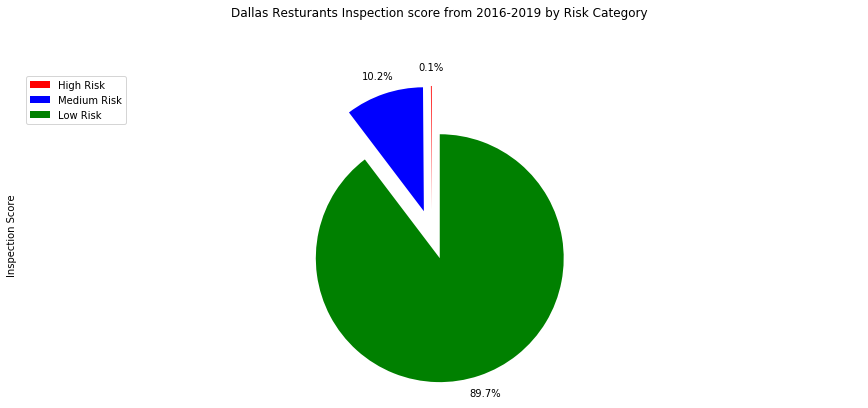

In [0]:
colors_list = ['red', 'blue', 'green']
explode_list = [0.2, 0.2, 0.2] # ratio for offsetting each wedge.

df_risk['Inspection Score'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

plt.title('Dallas Resturants Inspection score from 2016-2019 by Risk Category', y=1.15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_risk.index, loc='upper left') 

plt.show()

As it can be seen from the above pie chart that majority of (~90%) are low risk categories. This shows either the Dallas City officials are very strict or the retsuarants maintain a very high standard!!.

Now let's visualize how many number of resturants are in each risk category from 2016-2019

Text(0.5, 0, 'Risk')

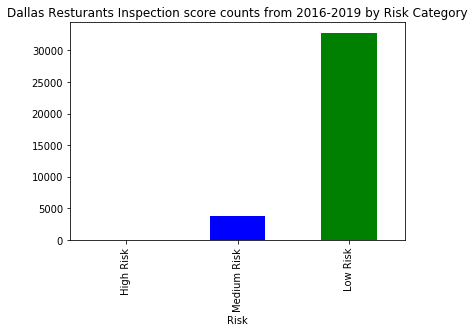

In [0]:
df_risk['Inspection Score'].plot.bar(color = colors_list)

plt.title('Dallas Resturants Inspection score counts from 2016-2019 by Risk Category')

plt.xlabel("Risk")

A bit more detail on the counts

In [0]:
dallas_merged_df['Risk'].value_counts()

Low Risk       32778
Medium Risk     3734
High Risk         41
Name: Risk, dtype: int64

Let us group the resturants on the basis of Risk and Inspection Year using Inspection Score to get year-wise details.

In [0]:
dl_df_year = dallas_merged_df.groupby(['Risk','Inspection Year'])['Inspection Score'].count()
dl_df_year.head(20)

Risk         Inspection Year
High Risk    2016                   2
             2017                  19
             2018                   9
             2019                  11
Medium Risk  2016                 262
             2017                1409
             2018                1346
             2019                 717
Low Risk     2016                3052
             2017               11802
             2018               12349
             2019                5575
Name: Inspection Score, dtype: int64

In [0]:
un_dl_df = dl_df_year.unstack()

In [0]:
df_all_year = un_dl_df.T
df_all_year

Risk,High Risk,Medium Risk,Low Risk
Inspection Year,,,
2016,2,262,3052
2017,19,1409,11802
2018,9,1346,12349
2019,11,717,5575


Now let's visualize how much percentage of restuarants are in each risk category in each year from 2016-2019

In [0]:
dallas_merged_df.groupby(['Inspection Year'])['Risk'].value_counts(normalize=True)

Inspection Year  Risk       
2016             Low Risk       0.920386
                 Medium Risk    0.079011
                 High Risk      0.000603
2017             Low Risk       0.892063
                 Medium Risk    0.106500
                 High Risk      0.001436
2018             Low Risk       0.901124
                 Medium Risk    0.098219
                 High Risk      0.000657
2019             Low Risk       0.884499
                 Medium Risk    0.113755
                 High Risk      0.001745
Name: Risk, dtype: float64

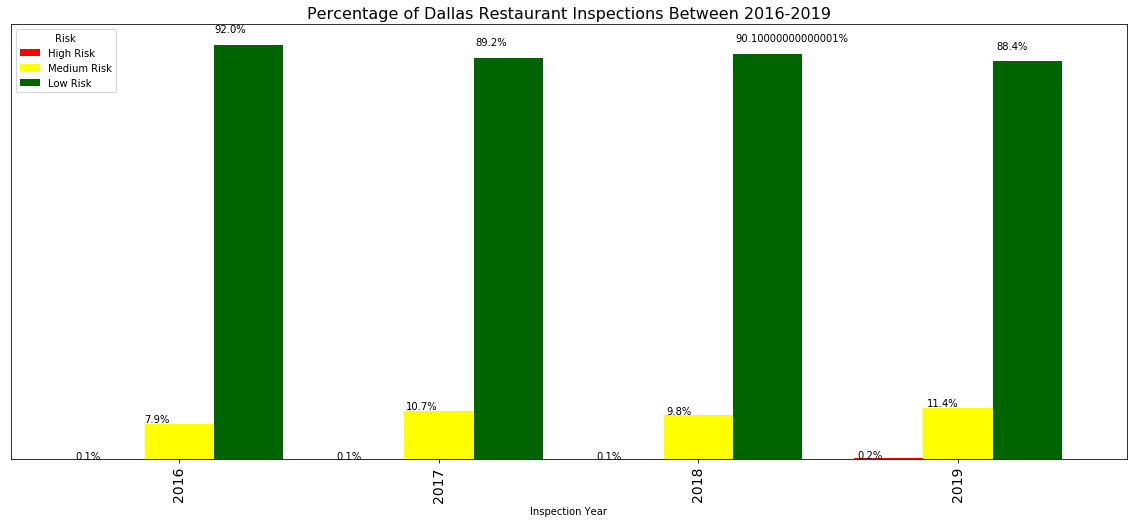

In [0]:
# Convert the numbers into percentages of the total number of respondents.

df_risk_percent = df_all_year.div(df_all_year.sum(1), axis=0).round(3)*100
#df_risk_percent = ((df_all_year / 36093) * 100).round(2)

# Create the plot
ax = df_risk_percent.plot(kind='bar',
                       figsize = (20, 8),
                       width = 0.8,
                       color = ['#FF0000', '#FFFF00', '#006400'],
                       fontsize = 14)

# Add title to the plot
plt.title('Percentage of Dallas Restaurant Inspections Between 2016-2019', fontsize=16)

# See link https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color/23907866
ax.set_facecolor((1.0, 1.0, 1.0))

# See link https://stackoverflow.com/questions/40705614/hide-axis-label-only-not-entire-axis-in-pandas-plot
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

# See link https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for i in ax.patches:
    ax.annotate(str(i.get_height()) + '%', (i.get_x() * 1.005, i.get_height() * 1.03))
    
plt.show()

Now that's very much appealing. Let us now visualize the Inspection score distribution in each year

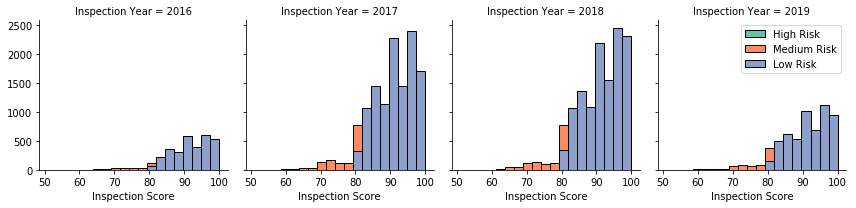

In [0]:
import seaborn as sns

bins = np.linspace(dallas_merged_df['Inspection Score'].min(), dallas_merged_df['Inspection Score'].max(), 20)
g = sns.FacetGrid(dallas_merged_df, col="Inspection Year", hue="Risk", palette="Set2", col_wrap=4)
g.map(plt.hist, 'Inspection Score', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
g.savefig("Overall_Inspection_Bar.png")

Let us also visualize during which days of the week most inspections were conducted in each year

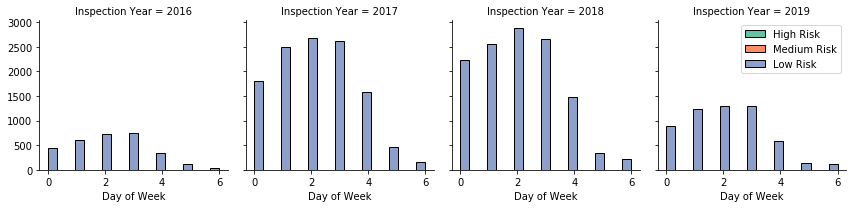

In [0]:
dallas_merged_df['Day of Week'] = dallas_merged_df['Inspection Date'].dt.dayofweek
bins = np.linspace(dallas_merged_df['Day of Week'].min(), dallas_merged_df['Day of Week'].max(), 20)
g = sns.FacetGrid(dallas_merged_df, col="Inspection Year", hue="Risk", palette="Set2", col_wrap=4)
g.map(plt.hist, 'Day of Week', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()
g.savefig("Overall_Inspection_DOW_bar.png")

It can be seen from the above graph that most of the inspections were conducted during the weekends. This is expected as more customers are expected during weekends and the restaurants are pushed to their limit.

Since the aim of the project is to analyze the performance of Indian resturants in Dallas City, we need to find the Indian restaurants from the above dataframe to proceed further. A simple google search revealed that most of the Indian resturants in Dallas the keywords such as Shiva, India, Masala, Spice, Mumbai, etc., in their name. So let's find out those.

In [0]:
indian_score = dallas_merged_df.loc[(dallas_merged_df['Restaurant Name'].str.contains('SHIVA')) | 
                                    (dallas_merged_df['Restaurant Name'].str.contains('INDIA')) | 
                                    (dallas_merged_df['Restaurant Name'].str.contains('MASALA'))|
                                    (dallas_merged_df['Restaurant Name'].str.contains('SPICE IN THE CITY'))|
                                    (dallas_merged_df['Restaurant Name'].str.contains('MUMBAI'))|
                                    (dallas_merged_df['Restaurant Name'].str.contains('MEERUT'))|
                                    (dallas_merged_df['Restaurant Name'].str.contains('8 CLOVES'))|
                                    (dallas_merged_df['Restaurant Name'].str.contains('KALACHAND'))|
                                    (dallas_merged_df['Restaurant Name'].str.contains('CURRY BLISS'))|
                                    (dallas_merged_df['Restaurant Name'].str.contains('SAFFRON HOUSE'))|
                                    (dallas_merged_df['Restaurant Name'].str.contains('SOUTHERN SPICE'))|
                                    (dallas_merged_df['Restaurant Name'].str.contains('SWADESHI'))|
                                    (dallas_merged_df['Restaurant Name'].str.contains('KESARI'))]
indian_score

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year,Day of Week
193,INDIA PALACE RESTAURANT,PRESTON,75230,Routine,2016-10-12,81,32.923460,-96.803630,Low Risk,Oct,2016,2
374,KALACHANDJI'S,GURLEY,75223,Routine,2016-10-18,95,32.794271,-96.750159,Low Risk,Oct,2016,1
2722,INDIA CHAAT CAFE,PRESTON,75252,Routine,2016-12-13,90,32.998852,-96.797507,Low Risk,Dec,2016,1
3637,SHIVAS BAR & GRILL,GREENVILLE,75206,Routine,2017-01-09,85,37.531860,-77.471669,Low Risk,Jan,2017,0
4125,MUMBAI GRILL,PRESTON,75252,Routine,2017-01-18,89,32.989660,-96.801854,Low Risk,Jan,2017,2
4782,SWADESHI INDIAN CUISINE,MCCALLUM,75252,Routine,2017-02-06,73,32.987996,-96.775685,Medium Risk,Feb,2017,0
5055,VINDU INDIAN CUISINE,FRANKFORD,75287,Routine,2017-02-13,82,32.998366,-96.826059,Low Risk,Feb,2017,0
5659,TAJ MAHAL INDIAN RESTAURA,CENTRAL,75231,Routine,2017-02-28,80,32.888793,-96.770120,Medium Risk,Feb,2017,1
5824,MEERUT KABAB HOUSE,HARRY HINES,75229,Routine,2017-03-06,94,32.892266,-96.890138,Low Risk,Mar,2017,0
5939,SWADESHI INDIAN CUISINE,MCCALLUM,75252,Follow-up,2017-03-08,80,32.987996,-96.775685,Medium Risk,Mar,2017,2


In [0]:
indian_rest_df = pd.DataFrame(indian_score)
indian_rest_df.reset_index(drop=True, inplace=True)
indian_rest_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year,Day of Week
0,INDIA PALACE RESTAURANT,PRESTON,75230,Routine,2016-10-12,81,32.923460,-96.803630,Low Risk,Oct,2016,2
1,KALACHANDJI'S,GURLEY,75223,Routine,2016-10-18,95,32.794271,-96.750159,Low Risk,Oct,2016,1
2,INDIA CHAAT CAFE,PRESTON,75252,Routine,2016-12-13,90,32.998852,-96.797507,Low Risk,Dec,2016,1
3,SHIVAS BAR & GRILL,GREENVILLE,75206,Routine,2017-01-09,85,37.531860,-77.471669,Low Risk,Jan,2017,0
4,MUMBAI GRILL,PRESTON,75252,Routine,2017-01-18,89,32.989660,-96.801854,Low Risk,Jan,2017,2


In [0]:
indian_rest_df.shape

(67, 12)

So there are 67 entries from our search. However, those are all not unique as they contain inspection details from 2016-2019 for the same restaurants.

Let us visualize the inspection score of Indian retuarants from 2016-2019 based on their risk category

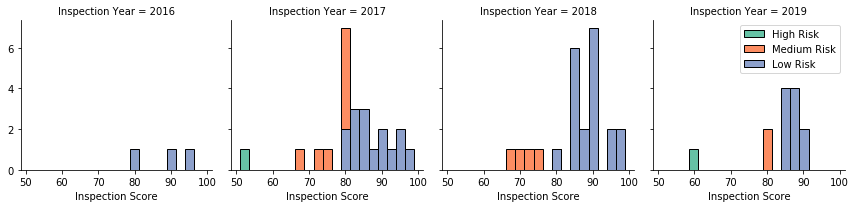

In [0]:
bins = np.linspace(indian_rest_df['Inspection Score'].min(), indian_rest_df['Inspection Score'].max(), 20)
g = sns.FacetGrid(indian_rest_df, col="Inspection Year", hue="Risk", palette="Set2", col_wrap=4)
g.map(plt.hist, 'Inspection Score', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
g.savefig("Indian_Restaurants_bar.png")

Let us group the above results based on restaurant name, risk and the Inspection Score

In [0]:
indian_year = indian_rest_df.groupby(['Restaurant Name','Risk','Inspection Year'])['Inspection Score'].count()
indian_year.head(100)

Restaurant Name            Risk         Inspection Year
8 CLOVES                   Medium Risk  2017               1
                           Low Risk     2017               1
                                        2018               3
                                        2019               1
INDIA CHAAT CAFE           Low Risk     2016               1
                                        2017               1
                                        2018               2
                                        2019               1
INDIA PALACE RESTAURANT    Medium Risk  2017               1
                           Low Risk     2016               1
                                        2017               2
                                        2018               2
                                        2019               1
KALACHANDJI'S              Low Risk     2016               1
                                        2017               2
                             

In [0]:
df_indian_risk = indian_year.groupby('Risk', axis=0).count()
df_indian_risk.head()

Risk
High Risk       2
Medium Risk    11
Low Risk       33
Name: Inspection Score, dtype: int64

So from 2016-2019 majority of the indian resturants have recieved good inspection score and are placed in low risk category

Let us now visulize the above numbers in percentage to compare

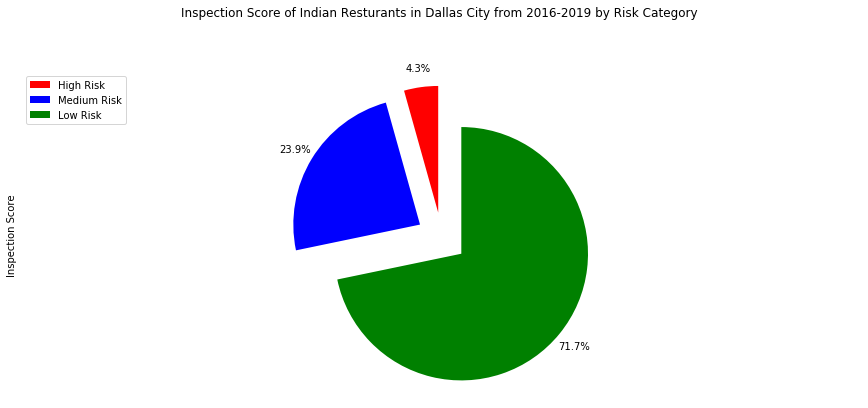

<Figure size 432x288 with 0 Axes>

In [0]:
colors_list = ['red', 'blue', 'green']
explode_list = [0.2, 0.2, 0.2] # ratio for each continent with which to offset each wedge.

df_indian_risk.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Inspection Score of Indian Resturants in Dallas City from 2016-2019 by Risk Category', y=1.15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_risk.index, loc='upper left') 

plt.show()

plt.savefig("Indian_Restaurants_pie.png")

Thus, ~72% of Indian restaurants were classified as Low risk from 2016-2019 which is a good number. 

Let us visulaize the violation descriptions of the indian restaurants from 2016-2019 using word cloud

In [0]:
indian_violation = dallas_df.loc[(dallas_df['Restaurant Name'].str.contains('SHIVA')) | 
                                    (dallas_df['Restaurant Name'].str.contains('INDIA')) | 
                                    (dallas_df['Restaurant Name'].str.contains('MASALA'))|
                                    (dallas_df['Restaurant Name'].str.contains('SPICE IN THE CITY'))|
                                    (dallas_df['Restaurant Name'].str.contains('MUMBAI'))|
                                    (dallas_df['Restaurant Name'].str.contains('MEERUT'))|
                                    (dallas_df['Restaurant Name'].str.contains('8 CLOVES'))|
                                    (dallas_df['Restaurant Name'].str.contains('KALACHAND'))|
                                    (dallas_df['Restaurant Name'].str.contains('CURRY BLISS'))|
                                    (dallas_df['Restaurant Name'].str.contains('SAFFRON HOUSE'))|
                                    (dallas_df['Restaurant Name'].str.contains('SOUTHERN SPICE'))|
                                    (dallas_df['Restaurant Name'].str.contains('SWADESHI'))|
                                    (dallas_df['Restaurant Name'].str.contains('KESARI'))]
indian_violation.head()

,Restaurant Name,Inspection Type,Inspection Date,Inspection Score,Street Number,Street Name,Street Direction,Street Type,Street Unit,Street Address,Zip Code,Violation Description - 1,Violation Points - 1,Violation Detail - 1,Violation Memo - 1,Violation Description - 2,Violation Points - 2,Violation Detail - 2,Violation Memo - 2,Violation Description - 3,Violation Points - 3,Violation Detail - 3,Violation Memo - 3,Violation Description - 4,Violation Points - 4,Violation Detail - 4,Violation Memo - 4,Violation Description - 5,Violation Points - 5,Violation Detail - 5,Violation Memo - 5,Violation Description - 6,Violation Points - 6,Violation Detail - 6,Violation Memo - 6,Violation Description - 7,Violation Points - 7,Violation Detail - 7,Violation Memo - 7,Violation Description - 8,...,Violation Memo - 16,Violation Description - 17,Violation Points - 17,Violation Detail - 17,Violation Memo - 17,Violation Description - 18,Violation Points - 18,Violation Detail - 18,Violation Memo - 18,Violation Description - 19,Violation Points - 19,Violation Detail - 19,Violation Memo - 19,Violation Description - 20,Violation Points - 20,Violation Detail - 20,Violation Memo - 20,Violation Description - 21,Violation Points - 21,Violation Detail - 21,Violation Memo - 21,Violation Description - 22,Violation Points - 22,Violation Detail - 22,Violation Memo - 22,Violation Description - 23,Violation Points - 23,Violation Detail - 23,Violation Memo - 23,Violation Description - 24,Violation Points - 24,Violation Detail - 24,Violation Memo - 24,Violation Description - 25,Violation Points - 25,Violation Detail - 25,Violation Memo - 25,Inspection Month,Inspection Year,Lat Long Location
193,INDIA PALACE RESTAURANT,Routine,10/12/2016,81,12817,PRESTON,NaN,RD,#105,12817 PRESTON RD #105,75230,"*28 Date marking > 24 hrs,on site,temp 41F",3.0,228.75 Food. Time and temperature co...,NaN,*39 Keep utensils handles upright or protected,1.0,228.125 Preventing Contamination. (a...,Bowl used for a scoop,*37 Storing the food at least 15 cm (6 inches)...,1.0,228.69 Food. Preventing contaminatio...,Cabbaged,*45 Floor contruction requirements,1.0,SEC. 17-6.2. ADDITIONAL REQUIREMENTS. (...,Cardboard on the floor,*29 Concentration of the sanitizing solution s...,2.0,"228.111 Equipment, Utensils, and Linens. ...",Lack of wiping rag water,*18 Toxic items stored above food/utensils,3.0,228.203 Poisonous or Toxic Materials. ...,Hand soap over food,"*35 Eating food, chewing gum, drinking beverag...",1.0,228.42 Management and Personnel. Food ...,NaN,*03 Food products not maintained at 135øF or a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 2016,FY2017,"12817 PRESTON RD #105\n(32.92346, -96.80363)"
374,KALACHANDJI'S,Routine,10/18/2016,95,5430,GURLEY,NaN,AVE,NaN,5430 GURLEY AVE,75223,*39 Store equipment & utensils - avoid contam...,1.0,"228.124 Equipment, Utensils, and Linens. ...",clean the equipment before storage. ( slicers ...,*22 Handlers-Certificate Not On Site,2.0,Sec. 17-2.2(d)(1)(A) (d) Food handlers. (...,NaN,*34 Exterior doors used as exits need not be s...,1.0,228.174 Physical Facilities. Functio...,the back door was left open ( all doors should...,*36 Cloths in-use for wiping between uses stored,1.0,228.68 Food. Preventing Contaminatio...,wiping clothes on the counters wet ( place in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 2016,FY2017,"5430 GURLEY AVE\n(32.794271, -96.750159)"
2722,INDIA CHAAT CAFE,Routine,12/13/2016,90,18101,PRESTON,NaN,RD,#202,18101 PRESTON RD #202,75252,*42 Dirty nonfood contact surfaces,1.0,"228.113 Equipment, Utensils, and Linens. ...","CLEAN GASKETS, SHELVES, WIC",*21 RFSM - Not On Site,2.0,Sec. 17-2.2(c)(1)(D) (c) Registered food ...,PROVIDE RFSM,*31 Handwashing lav

In [0]:
indian_violation_df = pd.DataFrame(indian_violation)
indian_violation_df.reset_index(drop=True, inplace=True)
indian_violation_df.head()

,Restaurant Name,Inspection Type,Inspection Date,Inspection Score,Street Number,Street Name,Street Direction,Street Type,Street Unit,Street Address,Zip Code,Violation Description - 1,Violation Points - 1,Violation Detail - 1,Violation Memo - 1,Violation Description - 2,Violation Points - 2,Violation Detail - 2,Violation Memo - 2,Violation Description - 3,Violation Points - 3,Violation Detail - 3,Violation Memo - 3,Violation Description - 4,Violation Points - 4,Violation Detail - 4,Violation Memo - 4,Violation Description - 5,Violation Points - 5,Violation Detail - 5,Violation Memo - 5,Violation Description - 6,Violation Points - 6,Violation Detail - 6,Violation Memo - 6,Violation Description - 7,Violation Points - 7,Violation Detail - 7,Violation Memo - 7,Violation Description - 8,...,Violation Memo - 16,Violation Description - 17,Violation Points - 17,Violation Detail - 17,Violation Memo - 17,Violation Description - 18,Violation Points - 18,Violation Detail - 18,Violation Memo - 18,Violation Description - 19,Violation Points - 19,Violation Detail - 19,Violation Memo - 19,Violation Description - 20,Violation Points - 20,Violation Detail - 20,Violation Memo - 20,Violation Description - 21,Violation Points - 21,Violation Detail - 21,Violation Memo - 21,Violation Description - 22,Violation Points - 22,Violation Detail - 22,Violation Memo - 22,Violation Description - 23,Violation Points - 23,Violation Detail - 23,Violation Memo - 23,Violation Description - 24,Violation Points - 24,Violation Detail - 24,Violation Memo - 24,Violation Description - 25,Violation Points - 25,Violation Detail - 25,Violation Memo - 25,Inspection Month,Inspection Year,Lat Long Location
0,INDIA PALACE RESTAURANT,Routine,10/12/2016,81,12817,PRESTON,NaN,RD,#105,12817 PRESTON RD #105,75230,"*28 Date marking > 24 hrs,on site,temp 41F",3.0,228.75 Food. Time and temperature co...,NaN,*39 Keep utensils handles upright or protected,1.0,228.125 Preventing Contamination. (a...,Bowl used for a scoop,*37 Storing the food at least 15 cm (6 inches)...,1.0,228.69 Food. Preventing contaminatio...,Cabbaged,*45 Floor contruction requirements,1.0,SEC. 17-6.2. ADDITIONAL REQUIREMENTS. (...,Cardboard on the floor,*29 Concentration of the sanitizing solution s...,2.0,"228.111 Equipment, Utensils, and Linens. ...",Lack of wiping rag water,*18 Toxic items stored above food/utensils,3.0,228.203 Poisonous or Toxic Materials. ...,Hand soap over food,"*35 Eating food, chewing gum, drinking beverag...",1.0,228.42 Management and Personnel. Food ...,NaN,*03 Food products not maintained at 135øF or a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 2016,FY2017,"12817 PRESTON RD #105\n(32.92346, -96.80363)"
1,KALACHANDJI'S,Routine,10/18/2016,95,5430,GURLEY,NaN,AVE,NaN,5430 GURLEY AVE,75223,*39 Store equipment & utensils - avoid contam...,1.0,"228.124 Equipment, Utensils, and Linens. ...",clean the equipment before storage. ( slicers ...,*22 Handlers-Certificate Not On Site,2.0,Sec. 17-2.2(d)(1)(A) (d) Food handlers. (...,NaN,*34 Exterior doors used as exits need not be s...,1.0,228.174 Physical Facilities. Functio...,the back door was left open ( all doors should...,*36 Cloths in-use for wiping between uses stored,1.0,228.68 Food. Preventing Contaminatio...,wiping clothes on the counters wet ( place in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 2016,FY2017,"5430 GURLEY AVE\n(32.794271, -96.750159)"
2,INDIA CHAAT CAFE,Routine,12/13/2016,90,18101,PRESTON,NaN,RD,#202,18101 PRESTON RD #202,75252,*42 Dirty nonfood contact surfaces,1.0,"228.113 Equipment, Utensils, and Linens. ...","CLEAN GASKETS, SHELVES, WIC",*21 RFSM - Not On Site,2.0,Sec. 17-2.2(c)(1)(D) (c) Registered food ...,PROVIDE RFSM,*31 Handwashing lavatory -

In [0]:
# Set stop words

stopwords = set(STOPWORDS)

# Create a list of violation description

violation_list = indian_violation_df['Violation Description - 1'].tolist()

word_string = " ".join(str(s) for s in violation_list)

wordcloud = WordCloud(background_color='white', max_words=2000,stopwords=stopwords).generate(word_string)

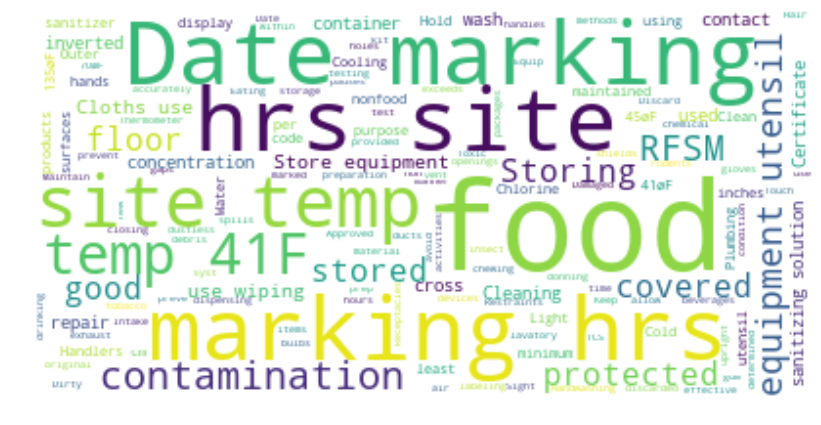

<Figure size 432x288 with 0 Axes>

In [0]:
# add the words said to stopwords
stopwords.add('Moderate risk') 
stopwords.add('risk')
stopwords.add('Moderate')
# re-generate the word cloud
wordcloud.generate(word_string)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig("Indian_Word_Cloud.png")

# 6. Modelling

Since the restaurants are categorized into three categories let us employ the classfication algorithm such as decision tree model and random forest model to predict the risk category.

In [0]:
dallas_merged_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year,Day of Week
0,HARVEY'S,PRESTON,75230,Routine,2016-10-03,82,32.924235,-96.803626,Low Risk,Oct,2016,0
1,7-11,LOVERS,75209,Routine,2016-10-03,86,32.851252,-96.823033,Low Risk,Oct,2016,0
2,MI HONDURAS,DENNIS,75229,Routine,2016-10-03,75,32.895847,-96.881391,Medium Risk,Oct,2016,0
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,2016-10-03,82,32.735560,-96.700079,Low Risk,Oct,2016,0
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,2016-10-03,80,32.756246,-96.701964,Medium Risk,Oct,2016,0


We Saw that most of the restaurants are inspected at the end of the week so let us employ feature binarization to set a threshold values less than fourth day.

In [0]:
dallas_merged_df['Weekend'] = dallas_merged_df['Day of Week'].apply(lambda x: 1 if (x>3)  else 0)
dallas_merged_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year,Day of Week,Weekend
0,HARVEY'S,PRESTON,75230,Routine,2016-10-03,82,32.924235,-96.803626,Low Risk,Oct,2016,0,0
1,7-11,LOVERS,75209,Routine,2016-10-03,86,32.851252,-96.823033,Low Risk,Oct,2016,0,0
2,MI HONDURAS,DENNIS,75229,Routine,2016-10-03,75,32.895847,-96.881391,Medium Risk,Oct,2016,0,0
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,2016-10-03,82,32.735560,-96.700079,Low Risk,Oct,2016,0,0
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,2016-10-03,80,32.756246,-96.701964,Medium Risk,Oct,2016,0,0


## a. One Hot Encoding

In [0]:
# Copy dataframe so that the original datframe is untouched

dallas_copy=dallas_merged_df.copy()
dallas_copy.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year,Day of Week,Weekend
0,HARVEY'S,PRESTON,75230,Routine,2016-10-03,82,32.924235,-96.803626,Low Risk,Oct,2016,0,0
1,7-11,LOVERS,75209,Routine,2016-10-03,86,32.851252,-96.823033,Low Risk,Oct,2016,0,0
2,MI HONDURAS,DENNIS,75229,Routine,2016-10-03,75,32.895847,-96.881391,Medium Risk,Oct,2016,0,0
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,Routine,2016-10-03,82,32.735560,-96.700079,Low Risk,Oct,2016,0,0
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,Routine,2016-10-03,80,32.756246,-96.701964,Medium Risk,Oct,2016,0,0


Let us do one-hot encoding for the categorical columns Such as Inspection month, Inspection Type and Risk.

In [0]:
dallas_copy['Inspection Month'].replace(to_replace=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], value=[1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
dallas_copy['Inspection Type'].replace(to_replace=['Routine','Follow-up','Complaint'], value=[1,2,3],inplace=True)
dallas_copy['Risk'].replace(to_replace=['Low Risk','Medium Risk','High Risk'], value=[1,2,3],inplace=True)
dallas_copy.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year,Day of Week,Weekend
0,HARVEY'S,PRESTON,75230,1,2016-10-03,82,32.924235,-96.803626,1,10,2016,0,0
1,7-11,LOVERS,75209,1,2016-10-03,86,32.851252,-96.823033,1,10,2016,0,0
2,MI HONDURAS,DENNIS,75229,1,2016-10-03,75,32.895847,-96.881391,2,10,2016,0,0
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,1,2016-10-03,82,32.735560,-96.700079,1,10,2016,0,0
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,1,2016-10-03,80,32.756246,-96.701964,2,10,2016,0,0


Let us check the correlation between each columns

In [0]:
dallas_copy.corr()

,Zip Code,Inspection Type,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year,Day of Week,Weekend
Zip Code,1.000000,-0.004415,0.007455,-0.010445,-0.005401,-0.004909,-0.007499,0.002432,0.001653,-0.006601
Inspection Type,-0.004415,1.000000,-0.121018,0.006540,0.001166,0.102133,0.015682,0.021213,-0.006730,-0.001102
Inspection Score,0.007455,-0.121018,1.000000,0.036167,0.028983,-0.669674,0.018065,-0.002628,-0.016631,-0.023892
Latitude,-0.010445,0.006540,0.036167,1.000000,0.263514,-0.021077,0.009938,-0.004225,-0.011197,-0.012784
Longitude,-0.005401,0.001166,0.028983,0.263514,1.000000,-0.017023,-0.011842,0.008335,0.000130,-0.011103
Risk,-0.004909,0.102133,-0.669674,-0.021077,-0.017023,1.000000,-0.014071,0.017804,0.016276,0.019094
Inspection Month,-0.007499,0.015682,0.018065,0.009938,-0.011842,-0.014071,1.000000,-0.427616,-0.003391,0.001861
Inspection Year,0.002432,0.021213,-0.002628,-0.004225,0.008335,0.017804,-0.427616,1.000000,-0.022742,-0.018321
Day of Week,0.001653,-0.006730,-0.016631,-0.011197,0.000130,0.016276,-0.003391,-0.022742,1.000000,0.714706
Weekend,-0.006601,-0.001102,-0.023892,-0.012784,-0.011103,0.019094,0.001861,-0.018321,0.714706,1.000000


Since the original datframe is quite large let us perform a machine learning classification for the resturants that had been inspected during the year 2016 only to avoid computational cost and derive meaningful results. 

In [0]:
dallas_2016_df=dallas_copy[dallas_copy['Inspection Year'] == 2016]
dallas_2016_df = dallas_2016_df.reset_index(drop=True)
dallas_2016_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year,Day of Week,Weekend
0,HARVEY'S,PRESTON,75230,1,2016-10-03,82,32.924235,-96.803626,1,10,2016,0,0
1,7-11,LOVERS,75209,1,2016-10-03,86,32.851252,-96.823033,1,10,2016,0,0
2,MI HONDURAS,DENNIS,75229,1,2016-10-03,75,32.895847,-96.881391,2,10,2016,0,0
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,1,2016-10-03,82,32.735560,-96.700079,1,10,2016,0,0
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,1,2016-10-03,80,32.756246,-96.701964,2,10,2016,0,0


In [0]:
dallas_2016_df.shape

(3316, 13)

Let us drop the duplicates in resturant name before proceeding further.

In [0]:
dallas_2016_df.drop_duplicates(subset ="Restaurant Name", keep = 'first', inplace = True)
dallas_2016_df.shape

(2974, 13)

In [0]:
dallas_2016_df.sort_values(by=['Restaurant Name'], ascending=True)
dallas_2016_df.head()

,Restaurant Name,Street Name,Zip Code,Inspection Type,Inspection Date,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Inspection Year,Day of Week,Weekend
0,HARVEY'S,PRESTON,75230,1,2016-10-03,82,32.924235,-96.803626,1,10,2016,0,0
1,7-11,LOVERS,75209,1,2016-10-03,86,32.851252,-96.823033,1,10,2016,0,0
2,MI HONDURAS,DENNIS,75229,1,2016-10-03,75,32.895847,-96.881391,2,10,2016,0,0
3,TORTILLERIA LA ESPIGA,JIM MILLER,75217,1,2016-10-03,82,32.735560,-96.700079,1,10,2016,0,0
4,TMGM @ KEETON PARK GOLF COURSE,JIM MILLER,75227,1,2016-10-03,80,32.756246,-96.701964,2,10,2016,0,0


Drop those unnecessarry columns before employing the classifier

In [0]:
# Drop columns that may not be needed

dallas_2016_df = dallas_2016_df.drop(columns=['Restaurant Name','Street Name','Zip Code','Inspection Date','Inspection Year'], axis=1)
dallas_2016_df.head()

,Inspection Type,Inspection Score,Latitude,Longitude,Risk,Inspection Month,Day of Week,Weekend
0,1,82,32.924235,-96.803626,1,10,0,0
1,1,86,32.851252,-96.823033,1,10,0,0
2,1,75,32.895847,-96.881391,2,10,0,0
3,1,82,32.735560,-96.700079,1,10,0,0
4,1,80,32.756246,-96.701964,2,10,0,0


In [0]:
dallas_2016_df.shape

(2974, 8)

Let us now check the datatypes of the columns in the resultant datafarme and to check for any missing values

In [0]:
dallas_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974 entries, 0 to 3315
Data columns (total 8 columns):
Inspection Type     2974 non-null int64
Inspection Score    2974 non-null int64
Latitude            2974 non-null float64
Longitude           2974 non-null float64
Risk                2974 non-null int64
Inspection Month    2974 non-null int64
Day of Week         2974 non-null int64
Weekend             2974 non-null int64
dtypes: float64(2), int64(6)
memory usage: 209.1 KB


Let us now visulize the correlation between each columns to understand their importance.

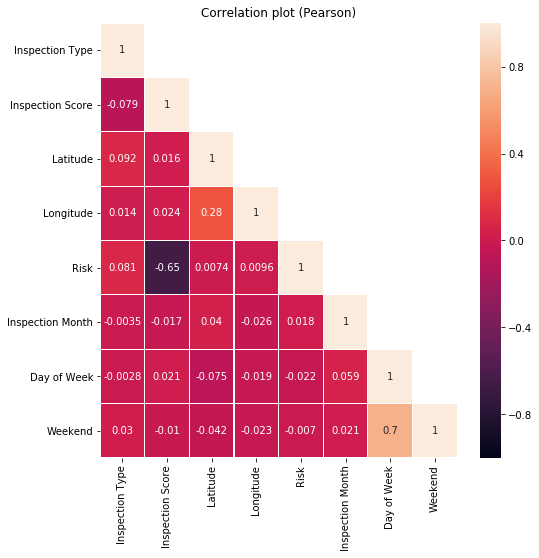

In [0]:
plt.figure(figsize = (8,8))
plt.title('Correlation plot (Pearson)')
corr = dallas_2016_df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, mask=mask, annot=True)
plt.show()

In [0]:
# Create the X variable for train

X = dallas_2016_df.copy() #--> This is the X in train test split
X.columns

Index(['Inspection Type', 'Inspection Score', 'Latitude', 'Longitude', 'Risk',
       'Inspection Month', 'Day of Week', 'Weekend'],
      dtype='object')

In [0]:
Y = dallas_2016_df['Risk']

In [0]:
# split the df into train and test in such a way so that these two don't communicate during the training

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [0]:
print(X_train.shape), print(y_train.shape)

(2081, 8)
(2081,)


(None, None)

In [0]:
print(X_test.shape), print(y_test.shape)

(893, 8)
(893,)


(None, None)

## b. Decision Tree Classifier Model

Let us create a decision tree classifier model to classify the restaurants inspected into their risk category

In [0]:
rest_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10, max_leaf_nodes=5)
rest_tree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# Classifier Training

rest_tree.fit(X_train, y_train)

# Prediction on the test

predictions = rest_tree.predict(X_test)

# Accuracy of the prediction

metrics.accuracy_score(y_test, predictions)

0.9988801791713325

Our model performs excellently. But this may overfit also. Let us use Random Forest Classsfier model to evluate further.

## c. Random Forest Classifier Model

In [0]:
# Build a random forest

rf_tree = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [0]:
# Classifier Training
rf_tree.fit(X_train, y_train);

# Prediction on the test

predictions = rf_tree.predict(X_test)

# Accuracy of the prediction

metrics.accuracy_score(y_test, predictions)

0.9988801791713325

There is no much difference between random forest and decision tree model. So let us now visualize a tree from random forest model.

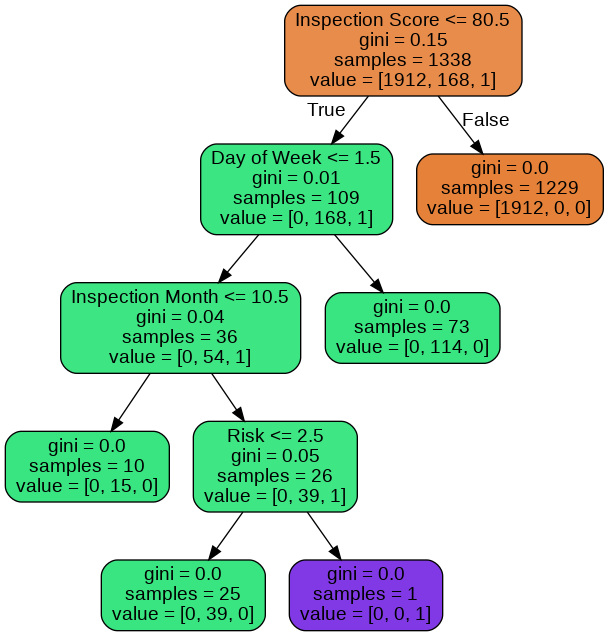

In [0]:
# Visulaizing a tree

# Extract single tree
estimator = rf_tree.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

import os
os.system('dot -Tpng tree.dot -o tree.png')

from IPython.display import Image
Image(filename = 'tree.png')

# 7. Indian Restaurants in Dallas City Visualization using Folium

In [0]:
address = 'Dallas, TX'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dallas City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Dallas City are 32.7762719, -96.7968559.


In [0]:
# create map of Dallas using latitude and longitude values
map_dallas = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, restaurant, street in zip(indian_rest_df['Latitude'], indian_rest_df['Longitude'], indian_rest_df['Restaurant Name'], indian_rest_df['Street Name']):
    label = '{}, {}'.format(restaurant, street)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7, parse_html=False).add_to(map_dallas)  
    
map_dallas

In [0]:
# instantiate a feature group for the incidents in the dataframe
inspection = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(indian_rest_df.Latitude, indian_rest_df.Longitude):
    inspection.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(indian_rest_df.Latitude)
longitudes = list(indian_rest_df.Longitude)
labels = list(indian_rest_df['Restaurant Name'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_dallas)    
    
# add incidents to map
map_dallas.add_child(inspection)

The image of the abovemap is given as Map.png in the repository as github will not render the map. https://github.com/aravindann92/Coursera_Capstone/blob/master/Map.PNG

# 8. Ratings of Indian Restaurants in Dallas City using FourSquare API

**Using Four Square API to segment neighborhood**

In [0]:
# Define FourSquare Credentials

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius=500
LIMIT=100

We define a function to intract with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude. Below function will return us the venue id , venue name and category.

In [0]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&intent=match'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Restaurant Name', 
                  'Street Latitude', 
                  'Street Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Venue ID']
    
    return(nearby_venues)

In [0]:
# Load the above result into a new data frame

dallas_venues = getNearbyVenues(names=indian_rest_df['Restaurant Name'],
                                   latitudes=indian_rest_df['Latitude'],
                                   longitudes=indian_rest_df['Longitude']
                                  )

In [0]:
dallas_venues.head()

,Restaurant Name,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,INDIA PALACE RESTAURANT,32.92346,-96.80363,Maple Leaf Diner,32.923504,-96.805358,Diner,560c1b96498e8c9340f3b635
1,INDIA PALACE RESTAURANT,32.92346,-96.80363,Mangiamo,32.924253,-96.804653,Italian Restaurant,4fff7787e4b0feba27da1be3
2,INDIA PALACE RESTAURANT,32.92346,-96.80363,India Palace,32.923530,-96.804359,Indian Restaurant,4a7b7247f964a52010eb1fe3
3,INDIA PALACE RESTAURANT,32.92346,-96.80363,Penzeys Spices,32.924269,-96.805392,Herbs & Spices Store,4b6f10d6f964a520abda2ce3
4,INDIA PALACE RESTAURANT,32.92346,-96.80363,May Nails Spa,32.923470,-96.804496,Nail Salon,4b548770f964a520b4be27e3


In [0]:
print('There are {} uniques categories.'.format(len(dallas_venues['Venue Category'].unique())))

There are 102 uniques categories.


In [0]:
# Let's check how many venues were returned for each neighborhood

dallas_venues.groupby('Venue').count()

,Restaurant Name,Street Latitude,Street Longitude,Venue Latitude,Venue Longitude,Venue Category,Venue ID
Venue,,,,,,,
18th Street Park,5,5,5,5,5,5,5
7-Eleven,22,22,22,22,22,22,22
A & D Buffalo's,5,5,5,5,5,5,5
AT&T,5,5,5,5,5,5,5
AT&T U-verse,1,1,1,1,1,1,1
Al-Kabob Grill & Cafe,10,10,10,10,10,10,10
Albertsons,5,5,5,5,5,5,5
Angelo and Vito's,5,5,5,5,5,5,5
Anytime Fitness,5,5,5,5,5,5,5


In [0]:
dallas_venues.shape

(1254, 8)

In [0]:
dallas_venues.to_csv('dallas_venues.csv', index=False)

In [0]:
dallas_venues = pd.read_csv('dallas_venues.csv')
dallas_venues.shape

(1254, 8)

In [0]:
# work only with neighborhood contains indian restaurant

indian_rate_df=dallas_venues[dallas_venues['Venue Category'].str.contains("Indian Restaurant")]
indian_rate_df

,Restaurant Name,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
2,INDIA PALACE RESTAURANT,32.923460,-96.803630,India Palace,32.923530,-96.804359,Indian Restaurant,4a7b7247f964a52010eb1fe3
43,INDIA CHAAT CAFE,32.998852,-96.797507,India Chaat Cafe,32.998751,-96.798569,Indian Restaurant,4b5cf902f964a5203b4d29e3
108,SWADESHI INDIAN CUISINE,32.987996,-96.775685,Swadeshi,32.988304,-96.775514,North Indian Restaurant,57490b4e498e3402f9c87d98
133,VINDU INDIAN CUISINE,32.998366,-96.826059,Vindu Indian Cuisine,32.998876,-96.826392,Indian Restaurant,4d94bab574c8236a5956c4fc
156,TAJ MAHAL INDIAN RESTAURA,32.888793,-96.770120,Taj Mahal Indian Restaurant & Bar,32.889420,-96.771410,Indian Restaurant,4b37e960f964a520704825e3
178,MEERUT KABAB HOUSE,32.892266,-96.890138,Al-Kabob Grill & Cafe,32.894350,-96.890937,Indian Restaurant,4d3ddd4aa2e4b1f764d0f525
194,SWADESHI INDIAN CUISINE,32.987996,-96.775685,Swadeshi,32.988304,-96.775514,North Indian Restaurant,57490b4e498e3402f9c87d98
202,INDIA PALACE RESTAURANT,32.923460,-96.803630,India Palace,32.923530,-96.804359,Indian Restaurant,4a7b7247f964a52010eb1fe3
225,INDIA PALACE RESTAURANT,32.923460,-96.803630,India Palace,32.923530,-96.804359,Indian Restaurant,4a7b7247f964a52010eb1fe3
290,INDIA CHAAT CAFE,32.998852,-96.797507,India Chaat Cafe,32.998751,-96.798569,Indian Restaurant,4b5cf902f964a5203b4d29e3


In [0]:
indian_rate_df.to_csv('indian_restaurants.csv', index=False)

In [0]:
indian_rate_df = pd.read_csv('indian_restaurants.csv')
indian_rate_df.shape

(39, 8)

Now we will define a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.

In [0]:
def get_Venue_Details(venue_id):
  ratings_list = []
  
  # Create the API request URL
  url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
  # make the GET request
  results = requests.get(url).json()
  print(results)
  return(results)

Since each restaurants are assigned an unique ID, we can get useful information if we just find out the unique ID of the restaurants and then rate them.

In [0]:
id_list = indian_rate_df['Venue ID'].unique().tolist()
id_list

['4a7b7247f964a52010eb1fe3',
 '4b5cf902f964a5203b4d29e3',
 '57490b4e498e3402f9c87d98',
 '4d94bab574c8236a5956c4fc',
 '4b37e960f964a520704825e3',
 '4d3ddd4aa2e4b1f764d0f525']

In [0]:
ratings_list=[]
def venue_ratings():
  for item in id_list:
    rating_details=get_Venue_Details(item)
    venue_data=rating_details['response']
    try:
        venue_id=venue_data['venue']['id']
        venue_name=venue_data['venue']['name']
        venue_likes=venue_data['venue']['likes']['count']
        venue_rating=venue_data['venue']['rating']
        venue_tips=venue_data['venue']['tips']['count']
        ratings_list.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
      pass
    column_names=['Venue ID','Venue Name','Venue Likes','Venue Rating','Venue Tips']
    df = pd.DataFrame(ratings_list,columns=column_names)
  return(df)

In [0]:
venue = venue_ratings()

{'meta': {'code': 200, 'requestId': '5d78a79fe0c0c9002cfb5ede'}, 'response': {'venue': {'id': '4a7b7247f964a52010eb1fe3', 'name': 'India Palace', 'contact': {'phone': '9723920190', 'formattedPhone': '(972) 392-0190', 'facebook': '313566009772', 'facebookUsername': 'indiapalacedallas', 'facebookName': 'India Palace'}, 'location': {'address': '12817 Preston Rd #105', 'crossStreet': 'LBJ', 'lat': 32.92353027438669, 'lng': -96.8043589474575, 'labeledLatLngs': [{'label': 'display', 'lat': 32.92353027438669, 'lng': -96.8043589474575}], 'postalCode': '75230', 'cc': 'US', 'city': 'Dallas', 'state': 'TX', 'country': 'United States', 'formattedAddress': ['12817 Preston Rd #105 (LBJ)', 'Dallas, TX 75230', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/india-palace/4a7b7247f964a52010eb1fe3', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v

In [0]:
venue.head()

,Venue ID,Venue Name,Venue Likes,Venue Rating,Venue Tips
0,4a7b7247f964a52010eb1fe3,India Palace,79,8.4,30
1,4b5cf902f964a5203b4d29e3,India Chaat Cafe,61,8.1,19
2,4d94bab574c8236a5956c4fc,Vindu Indian Cuisine,17,6.8,14
3,4b37e960f964a520704825e3,Taj Mahal Indian Restaurant & Bar,23,7.2,17
4,4d3ddd4aa2e4b1f764d0f525,Al-Kabob Grill & Cafe,9,7.6,7


In [0]:
venue.to_csv("Indian_Restaurants_Ratings.csv", index=False)

In [0]:
rating_df = pd.read_csv("Indian_Restaurants_Ratings.csv")
rating_df

,Venue ID,Venue Name,Venue Likes,Venue Rating,Venue Tips
0,4a7b7247f964a52010eb1fe3,India Palace,79,8.4,30
1,4b5cf902f964a5203b4d29e3,India Chaat Cafe,61,8.1,19
2,4d94bab574c8236a5956c4fc,Vindu Indian Cuisine,17,6.8,14
3,4b37e960f964a520704825e3,Taj Mahal Indian Restaurant & Bar,23,7.2,17
4,4d3ddd4aa2e4b1f764d0f525,Al-Kabob Grill & Cafe,9,7.6,7


Thus based on the ratings received by the restaurants, India Palace is the best Indian restaurant to dine in Dallas City.

In [0]:
restaurant_names = rating_df['Venue Name'].values.tolist()
restaurant_names

['India Palace',
 'India Chaat Cafe',
 'Vindu Indian Cuisine',
 'Taj Mahal Indian Restaurant & Bar',
 'Al-Kabob Grill & Cafe']

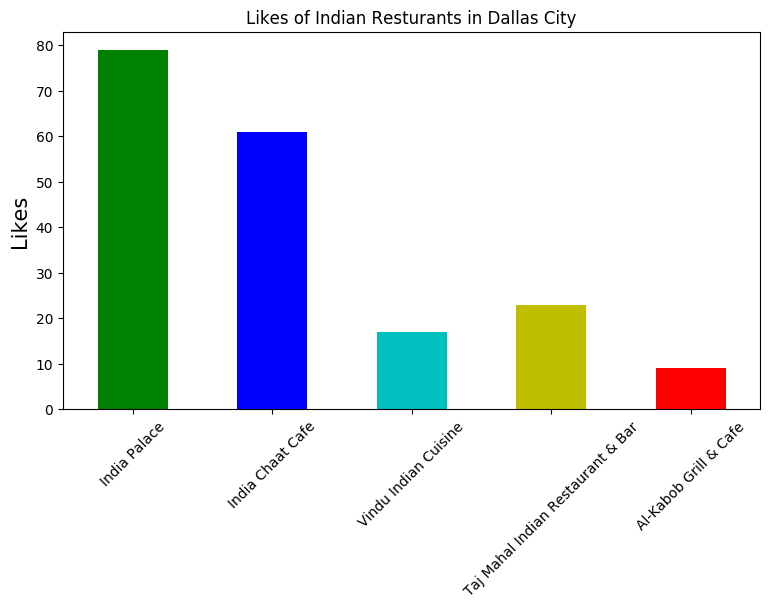

In [0]:
# Plot likes for each restaurant
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('Likes of Indian Resturants in Dallas City')

#On y-axis
plt.ylabel('Likes', fontsize=15)

#giving a bar plot
rating_df['Venue Likes'].plot(kind='bar', color = ('g','b','c','y','r'))

# set the locations and labels of the xticks
plt.xticks( np.arange(5), (restaurant_names), rotation=45)

#displays the plot
plt.show()

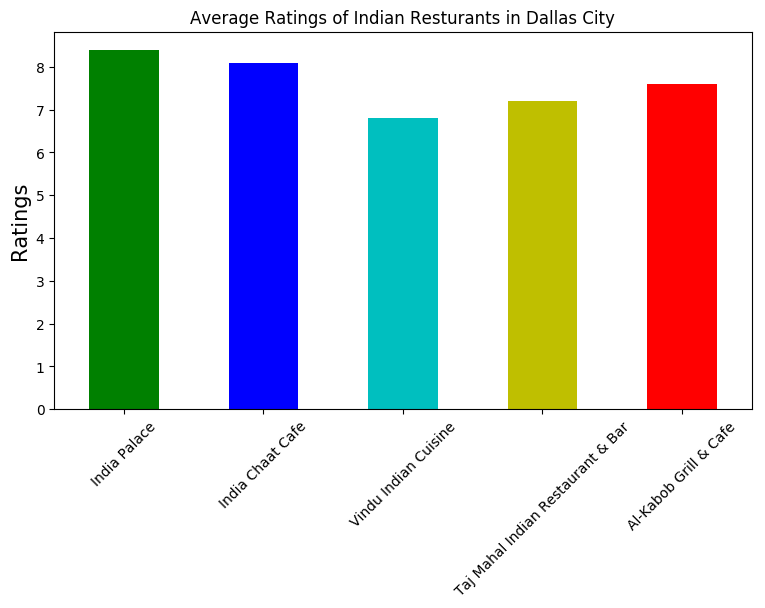

In [0]:
# Plot likes for each restaurant
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('Average Ratings of Indian Resturants in Dallas City')

#On y-axis
plt.ylabel('Ratings', fontsize=15)

#giving a bar plot
rating_df['Venue Rating'].plot(kind='bar', color = ('g','b','c','y','r'))

# set the locations and labels of the xticks
plt.xticks( np.arange(5), (restaurant_names), rotation=45 )

#displays the plot
plt.show()

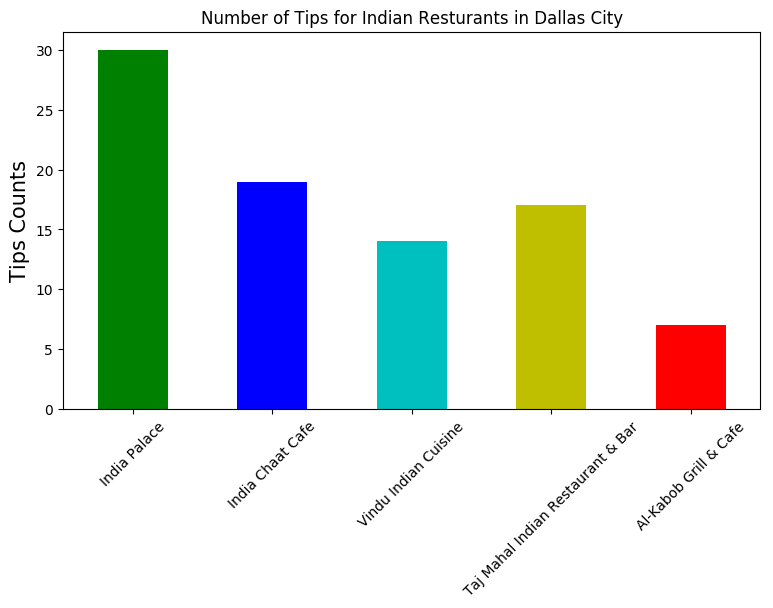

In [0]:
# Plot likes for each restaurant
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('Number of Tips for Indian Resturants in Dallas City')

#On y-axis
plt.ylabel('Tips Counts', fontsize=15)

#giving a bar plot
rating_df['Venue Tips'].plot(kind='bar', color = ('g','b','c','y','r'))

# set the locations and labels of the xticks
plt.xticks( np.arange(5), (restaurant_names), rotation=45 )

#displays the plot
plt.show()

# 7. Conclusions



This project successfully completes my IBM Data Science Professional Certification Trianing. I am quite new to the data science and I had a steep learnig curve during the course. I have really enjoyed doing all the lab excersies and the courses were really informative. The following are the conclusions that I derive from this project:
*   Dallas City have only very few Indian restaurants. Hence, it has a potential market for opening a new Indian restaurant
*   Roughly 80% of Indian restaurants that are cuurrently present in Dallas City are placed in low risk category based on the inspection data from 2016-2019
*   A decision tree classifier model is built for classifying the restaurants into various risk categories and the model performs well for the given data set. This will help the restaurants in predicting their risk category for a given year.
*   The Indian restaurants in the Dallas City were visulaized using the folium map rendering library
*   Using FourSquare API, the venue details for the Indian restaurants were analyzed and found that among all the restaurants in Dallas City India Palace is the best place to dine.


# 8. Limitations and Future Work

* The restaurants are ranked solely on the data provided by FourSquare API. If data on other demographics are available this can be improved
* The accuracy of location data depends on Dallas City Inspection Data and FourSquare API. Hence, need to be analyzed further as there are some ambiguous entries.
* The machine learning model will be further improved as the model developed may be prone to over-fitting